<a href="https://colab.research.google.com/github/ale-chen/ML-Projects/blob/main/Discriminator3Ways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penguins**
---
*Alec Chen*

The Palmer penguins data set has been split into a training set and a testing set (n =265 and n =97). This data set has two “label” variables (sex and species) and four numerical “features.” We will try to classify penguins by species using three techniques that look at linear combinations of the feature vectors.

# **A. LINEAR REGRESSION**

In [3]:
#Colab has old version of scikit-learn installed
%pip install -U scikit-learn --user

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import math

train_data = pd.read_csv("penguinsTrain.csv")
test_data = pd.read_csv("penguinsTest.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#IMPORT DATA

train_data = pd.read_csv("penguinsTrain.csv")
train_data.dropna()
test_data = pd.read_csv("penguinsTest.csv")

#CLEAN DATA

train_data = train_data[np.isfinite(train_data["Beak Depth (mm)"]) & 
                        np.isfinite(train_data["Body Mass (g)"]) &
                        np.isfinite(train_data["Flipper Length (mm)"]) & 
                        np.isfinite(train_data["Beak Length (mm)"])]

test_data = test_data[np.isfinite(test_data["Beak Depth (mm)"]) & 
                        np.isfinite(test_data["Body Mass (g)"]) &
                        np.isfinite(test_data["Flipper Length (mm)"]) & 
                        np.isfinite(test_data["Beak Length (mm)"])]

In [5]:
#SEPARATE INTO TEST/TRAIN X AND Y

X_train = train_data[['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
y_train = train_data['Species']
X_test = test_data[['Beak Length (mm)', 'Beak Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
y_test = test_data['Species']

#TRANSLATE Y'S INTO ONE-HOT-ENCODING I.E. [1 0 0] [0 1 0] ETC

ohe = OneHotEncoder(sparse = False)

y_train_encoded = ohe.fit_transform(y_train.values.reshape(-1,1))

y_test_encoded = ohe.fit_transform(y_test.values.reshape(-1,1))

In [6]:
#FIT COEFFICIENTS USING SKLEARN LIN. REGRESSION

linear = LinearRegression()
linear.fit(X_train, y_train_encoded)
linear.score(X_test, y_test_encoded)

0.8472138499116683

*Now for the Graphing!*

In [7]:
#COLORS, SET COLORS

colorMatch = {
    "Gentoo": "teal",
    "Chinstrap":"olive",
    "Adelie": "crimson"
}
colors = []
for Species in train_data["Species"]:
  colors.append(colorMatch[Species])

In [8]:
'''
print(linear.coef_)

print(np.dot(linear.coef_, X_train.values[0]) + linear.intercept_)
print(train_data.values[0])
print(y_train[0])

print(np.dot(linear.coef_, X_train.values[1])+ linear.intercept_)
print(train_data.values[1])
print(y_train[1])

print(np.dot(linear.coef_, X_train.values[98])+ linear.intercept_)
print(train_data.values[98])
print(y_train[98])
'''
# CHOOSING TO GRAPH FLIPPER LENGTH IN TERMS OF BEAK DEPTH, BEAK LENGTH; BODY-WEIGHT HELD CONSTANT

x4mean = X_train["Body Mass (g)"].mean()

#SOME HS ALGEBRA

#x_3 in terms of x_1, x_2, x_4
def f(species: int, x_1, x_2, x_4):
  return(
      (.5 - linear.intercept_[species] - linear.coef_[species][0] * x_1 - linear.coef_[species][1] * x_2 - linear.coef_[species][3] * x_4)
      /
      linear.coef_[species][2]
  )
#SET X Y PLANE BOUNDS

x_1 = [0, 0, 60, 60]

x_2 = [0, 60, 60, 0]
#Adelie Plane
x_3_adelie = [
    f(0,x_1[0], x_2[0], x4mean),
    f(0,x_1[1], x_2[1], x4mean),
    f(0,x_1[2], x_2[2], x4mean),
    f(0,x_1[3], x_2[3], x4mean)
       ]
#Chinstrap plane
x_3_chinstrap = [
    f(1,x_1[0], x_2[0], x4mean),
    f(1,x_1[1], x_2[1], x4mean),
    f(1,x_1[2], x_2[2], x4mean),
    f(1,x_1[3], x_2[3], x4mean)
       ]
#Gentoo plane
x_3_gentoo = [
    f(2,x_1[0], x_2[0], x4mean),
    f(2,x_1[1], x_2[1], x4mean),
    f(2,x_1[2], x_2[2], x4mean),
    f(2,x_1[3], x_2[3], x4mean)
       ]

#CREATE PLOTLY GRAPH, ADD SCATTER & PLANE DECISION BOUNDARIES.
#DECISION BOUNDARY IS 2D, BECAUSE GRAPH IS 3D
"""print(x_3)"""
fig = go.Figure(data=[
    go.Scatter3d(x=train_data['Beak Length (mm)'], y=train_data['Beak Depth (mm)'], z=train_data['Flipper Length (mm)'], mode='markers', marker=dict(color=colors, size=8, opacity=0.8)),
    go.Mesh3d(x=x_1, y=x_2, z=x_3_adelie,
                       color=colorMatch['Adelie'],
                       opacity=0.5),
    go.Mesh3d(x=x_1, y=x_2, z=x_3_chinstrap,
                       color=colorMatch['Chinstrap'],
                       opacity=0.5),
    go.Mesh3d(x=x_1, y=x_2, z=x_3_gentoo,
                       color=colorMatch['Gentoo'],
                       opacity=0.5)
])

#SET BOUNDS FOR FIGURE, COLORS, AXIS LABELS

fig.update_layout(scene=dict(xaxis=dict(title='Beak Length (mm)', range = [train_data['Beak Length (mm)'].min(),train_data['Beak Length (mm)'].max()]),
           yaxis=dict(title='Beak Depth (mm)', range = [train_data['Beak Depth (mm)'].min(),train_data['Beak Depth (mm)'].max()]),
           zaxis=dict(title='Flipper Length (mm)', range = [train_data['Flipper Length (mm)'].min(),train_data['Flipper Length (mm)'].max()])
           ))
fig.show()

# **B. LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import datasets
from matplotlib.patches import Ellipse
from sklearn.preprocessing import normalize
"""
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
"""
typeMatch = {
    "Gentoo": 2,
    "Chinstrap": 1,
    "Adelie": 0
}
y_train_log = []
for Species in y_train:
  y_train_log.append(typeMatch[Species])

log = LogisticRegression(max_iter = 1000).fit(X_train, y_train_log)

print(log.coef_)

print(np.dot(log.coef_, X_train.values[1]) + log.intercept_)
print(train_data.values[1])
print(y_train_encoded[1])

[[-9.55827841e-01  1.48380698e+00  6.98137891e-02  8.28172195e-04]
 [ 1.05534024e+00 -1.83110455e-01 -1.17280438e-01 -4.93249913e-03]
 [-9.95123982e-02 -1.30069652e+00  4.74666485e-02  4.10432694e-03]]
[-3.76074793 -2.63588219  6.39663013]
[310 'Gentoo' 'Biscoe' 47.5 15.0 218.0 4950.0 'FEMALE']
[0. 0. 1.]


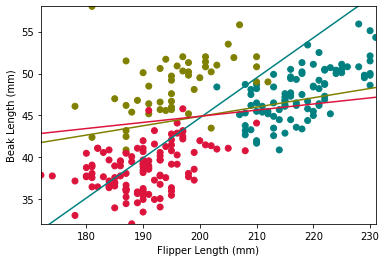

In [ ]:
x2mean = X_train["Beak Depth (mm)"].mean()
x3mean = X_train["Flipper Length (mm)"].mean()

#x_1 in terms of x_3
def g(species: int, x_2, x_3, x_4):
  return(
    (-1 * math.log((1/.5)-1) - log.intercept_[species] - (log.coef_[species][1] * x_2) - (log.coef_[species][2] * x_3) - (log.coef_[species][3] * x_4))
    /
    log.coef_[species][0]
  )

fig, ax = plt.subplots()

#plt.scatter(X_train['Flipper Length (mm)'], X_train["Beak Length (mm)"], c=colors, edgecolors="k", cmap=plt.cm.Paired)


#    "Gentoo": "teal", "Chinstrap":"olive", "Adelie": "crimson" !!!

x = np.linspace(150,240,90)

yG = g(2, x2mean, x, x4mean)

yC = g(1, x2mean, x, x4mean)

yA = g(0, x2mean, x, x4mean)

scatter = ax.scatter(X_train['Flipper Length (mm)'], X_train["Beak Length (mm)"], c=colors)

"""
yG = g(2, x, x3mean, x4mean)

yC = g(1, x, x3mean, x4mean)

yA = g(0, x, x3mean, x4mean)

scatter = ax.scatter(X_train['Beak Depth (mm)'], X_train["Beak Length (mm)"], c=colors)
"""


plt.plot(x,yG, "teal")
plt.plot(x,yC, "olive")
plt.plot(x,yA, "crimson")

plt.xlim(train_data['Flipper Length (mm)'].min(),train_data['Flipper Length (mm)'].max())
plt.ylim(train_data['Beak Length (mm)'].min(),train_data['Beak Length (mm)'].max())

plt.xlabel('Flipper Length (mm)')
plt.ylabel("Beak Length (mm)")
plt.show()

## **C. CLASS-CONDITIONAL MULTIVARIATE NORMAL**

In [ ]:
ax.cla()
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap
#Beak Depth is x2 Flipper Length is x3, so the covariance we want is in the center of the larger covariance

gmm = GaussianMixture(n_components=3,covariance_type="full").fit(X_train)
print(gmm.covariances_)
print(gmm.means_)

[[[ 9.22030105e+00  1.93415744e+00  1.28523278e+01  1.02847262e+03]
  [ 1.93415744e+00  9.29195275e-01  4.51840481e+00  3.49955667e+02]
  [ 1.28523278e+01  4.51840481e+00  4.40033165e+01  2.31048676e+03]
  [ 1.02847262e+03  3.49955667e+02  2.31048676e+03  2.63445043e+05]]

 [[ 3.57863053e+01  3.07879733e+00  2.22854488e+01  1.17770102e+03]
  [ 3.07879733e+00  1.18030951e+00  3.93167704e+00  2.70112140e+02]
  [ 2.22854488e+01  3.93167704e+00  5.13073533e+01  1.73150979e+03]
  [ 1.17770102e+03  2.70112140e+02  1.73150979e+03  1.61279986e+05]]

 [[ 3.61527366e+00 -9.32198690e-02  9.55425783e+00  5.50320888e+02]
  [-9.32198690e-02  1.04537130e+00  1.72430774e+00 -5.10531903e+00]
  [ 9.55425783e+00  1.72430774e+00  7.47818515e+01  2.60960323e+03]
  [ 5.50320888e+02 -5.10531903e+00  2.60960323e+03  1.89716587e+05]]]
[[  47.66156232   15.01557786  217.61516478 5105.42265429]
 [  42.32525482   18.05137827  192.28163778 3612.39432879]
 [  39.66377125   18.9396798   190.11400787 3998.32333337]]


In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 5):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    gmm = GaussianMixture(n_components=3,covariance_type="full").fit(X_train)
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    plt.ylabel('Flipper Length (mm)')
    plt.xlabel("Beak Depth (mm)")
    if label:
        ax.scatter(train_data["Beak Depth (mm)"],train_data['Flipper Length (mm)'], c=colors, s=40, cmap='viridis', zorder=2)
        #plt.xlim(train_data["Beak Depth (mm)"].min(),train_data["Beak Depth (mm)"].max())
        #plt.ylim(train_data['Flipper Length (mm)'].min(),train_data['Flipper Length (mm)'].max())
    else:
        ax.scatter(X_train[:, 0], X_train[:, 1], s=40, zorder=2)
        plt.xlim(train_data["Beak Depth (mm)"].min(),train_data["Beak Depth (mm)"].max())
        plt.ylim(train_data['Flipper Length (mm)'].min(),train_data['Flipper Length (mm)'].max())
    
    w_factor = 0.2 / gmm.weights_.max()
    iterator = 0
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        neededPos = pos[1:3]
        neededCovar = np.array([
            [covar[1][1].copy(), covar[1][2].copy()],
            [covar[1][2].copy(), covar[2][2].copy()]])
        if iterator==0:
            draw_ellipse(neededPos, neededCovar, alpha=w * w_factor,fc=colorMatch["Adelie"],ec = "black" , lw = 3)
        elif iterator == 1:
            draw_ellipse(neededPos, neededCovar, alpha=w * w_factor,fc=colorMatch["Chinstrap"],ec = "black", lw = 3)
        elif iterator == 2:
            draw_ellipse(neededPos, neededCovar, alpha=w * w_factor,fc=colorMatch["Gentoo"],ec = "black", lw = 3)
        iterator+=1

In [ ]:
from scipy.optimize.zeros import RootResults
#PLOT QUADRATIC BOUNDARIES
def quadratic_boundary(class1_mean, class1_cov, class2_mean, class2_cov):
    class1_cov_inv = np.linalg.inv(class1_cov)
    class2_cov_inv = np.linalg.inv(class2_cov)
    mean_diff = class1_mean - class2_mean

    constant = -0.5 * np.dot(np.dot(class1_mean, class1_cov_inv), class1_mean) + 0.5 * np.dot(np.dot(class2_mean, class2_cov_inv), class2_mean) + np.log(np.linalg.det(class1_cov) / np.linalg.det(class2_cov))
    linear = np.dot(class1_cov_inv - class2_cov_inv, mean_diff)
    quadratic = class1_cov_inv - class2_cov_inv

    # Return the equation of the quadratic boundary in the form "ax^2 + bx + c = 0"
    return [quadratic[0][0], linear[0], constant]

def reduceCovar(covar):
  return np.array([
            [covar[1][1], covar[1][2]],
            [covar[1][2], covar[2][2]]])

def qAC(x):
  coeffs = quadratic_boundary(
      gmm.means_[0][1:3],
      reduceCovar(gmm.covariances_[0]),
      gmm.means_[1][1:3],
      reduceCovar(gmm.covariances_[1])
      )
  result = []
  for i in x:
    result.append(coeffs[0] * math.pow(i,2) + coeffs[1] * i + coeffs[2])
  return result

def qAG(x):
  coeffs = quadratic_boundary(
  gmm.means_[0][1:3],
  reduceCovar(gmm.covariances_[0]),
  gmm.means_[2][1:3],
  reduceCovar(gmm.covariances_[2]))

  result = []
  for i in x:
    result.append(coeffs[0] * math.pow(i,2) + coeffs[1] * i + coeffs[2])
  return result

def qCG(x):
  coeffs = quadratic_boundary(
  gmm.means_[1][1:3],
  reduceCovar(gmm.covariances_[1]),
  gmm.means_[2][1:3],
  reduceCovar(gmm.covariances_[2]))
  
  result = []
  for i in x:
    result.append(coeffs[0] * math.pow(i,2) + coeffs[1] * i + coeffs[2])
  return result

def h(x):
  a = [.14722,1.50034,144.1031] # CALCULATED BY HAND BY FINDING 3 INTERSECTIONS OF ELLIPSES, THEN FINDING QUAD. EQUATION
  result = []
  for i in x:
    result.append(a[0] * math.pow(i,2) + a[1] * i + a[2])
  return result

''

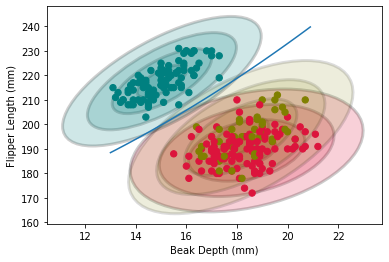

In [ ]:
x_vals = np.arange(13,21,.1)
y_valsAG = h(x_vals)
#print(X_train)

plt.plot(x_vals, y_valsAG)
plot_gmm(gmm, X_train)

""""""

In [ ]:
#d) Confusion Matrix
from sklearn.metrics import confusion_matrix

predicted = []
for i, k in enumerate(X_test.values):
  #print(np.dot(linear.coef_, X_train.values[0]) + linear.intercept_)
  predicted.append(np.dot(linear.coef_, X_test.values[i]) + linear.intercept_)

pred = []
true = []

for indx, i in enumerate(predicted):
  pred.append(i.tolist().index(max(i)))
  true.append(typeMatch[y_test[indx]])

#print(pred,true)

#CONFUSION MATRIX FOR LIN. REGRESSION
print(confusion_matrix(true, pred))

[[35  0  0]
 [ 1 19  0]
 [ 0  0 32]]
